#Assignment: End-to-End Machine Learning Pipeline
Apply everything I have learned so far to build a complete machine learning pipeline — from raw data to model evaluation.

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import RandomizedSearchCV

In [5]:
# show all the rows
pd.set_option('Display.max_rows',None)

In [6]:
# show all columns
pd.set_option('Display.max_columns',None)

In [7]:
# reading the dataset
df = pd.read_csv('Life Expectancy Data.csv')
df

Country  Year      Status  \
0                                           Afghanistan  2015  Developing   
1                                           Afghanistan  2014  Developing   
2                                           Afghanistan  2013  Developing   
3                                           Afghanistan  2012  Developing   
4                                           Afghanistan  2011  Developing   
5                                           Afghanistan  2010  Developing   
6                                           Afghanistan  2009  Developing   
7                                           Afghanistan  2008  Developing   
8                                           Afghanistan  2007  Developing   
9                                           Afghanistan  2006  Developing   
10                                          Afghanistan  2005  Developing   
11                                          Afghanistan  2004  Developing   
12                                          Afghanistan  2003  Developing   
13                                          Afghanistan  2002  Developing   
14                                          Afghanistan  2001  Developing   
15                                          Afghanistan  2000  Developing   
16                                              Albania  2015  Developing   
17                                              Albania  2014  Developing   
18                                              Albania  2013  Developing   
19                                              Albania  2012  Developing   
20                                              Albania  2011  Developing   
21                                              Albania  2010  Developing   
22                                              Albania  2009  Developing   
23                                              Albania  2008  Developing   
24                                              Albania  2007  Developing   
25                                              Albania  2006  Developing   
26                                              Albania  2005  Developing   
27                                              Albania  2004  Developing   
28                                              Albania  2003  Developing   
29                                              Albania  2002  Developing   
30                                              Albania  2001  Developing   
31                                              Albania  2000  Developing   
32                                              Algeria  2015  Developing   
33                                              Algeria  2014  Developing   
34                                              Algeria  2013  Developing   
35                                              Algeria  2012  Developing   
36                                              Algeria  2011  Developing   
37                                              Algeria  2010  Developing   
38                                              Algeria  2009  Developing   
39                                              Algeria  2008  Developing   
40                                              Algeria  2007  Developing   
41                                              Algeria  2006  Developing   
42                                              Algeria  2005  Developing   
43                                              Algeria  2004  Developing   
44                                              Algeria  2003  Developing   
45                                              Algeria  2002  Developing   
46                                              Algeria  2001  Developing   
47                                              Algeria  2000  Developing   
48                                               Angola  2015  Developing   
49                                               Angola  2014  Developing   
50                                               Angola  2013  Developing   
51                                          

In [8]:
#styling in plt
print(plt.style.available)
plt.style.use('ggplot')


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Statistical Analysis

In [9]:
# taking the first 5 values
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [10]:
# checking the last 5 values
df.tail()

Country  Year      Status  Life expectancy   Adult Mortality  \
2933  Zimbabwe  2004  Developing              44.3            723.0   
2934  Zimbabwe  2003  Developing              44.5            715.0   
2935  Zimbabwe  2002  Developing              44.8             73.0   
2936  Zimbabwe  2001  Developing              45.3            686.0   
2937  Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2933             27     4.36                     0.0         68.0        31   
2934             26     4.06                     0.0          7.0       998   
2935             25     4.43                     0.0         73.0       304   
2936             25     1.72                     0.0         76.0       529   
2937             24     1.68                     0.0         79.0      1483   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
2933   27.1                  42   67.0               7.13         65.0   
2934   26.7                  41    7.0               6.52         68.0   
2935   26.3                  40   73.0               6.53         71.0   
2936   25.9                  39   76.0               6.16         75.0   
2937   25.5                  39   78.0               7.10         78.0   

       HIV/AIDS         GDP  Population   thinness  1-19 years  \
2933       33.6  454.366654  12777511.0                    9.4   
2934       36.7  453.351155  12633897.0                    9.8   
2935       39.8   57.348340    125525.0                    1.2   
2936       42.1  548.587312  12366165.0                    1.6   
2937       43.5  547.358878  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  
2933                  9.4                            0.407        9.2  
2934                  9.9                            0.418        9.5  
2935                  1.3                            0.427       10.0  
2936                  1.7                            0.427        9.8  
2937                 11.2                            0.434        9.8

In [11]:
# checking the number of rows and columns
df.shape

(2938, 22)

In [12]:
# checking the names of all the columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
# we are noe checking some general info about are dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [14]:
# now we will see all the mean median etc values
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [15]:
# checking the non numerical columns
df.describe(include='object')

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

# Data PreProcessing

In [16]:
# checking the missing values of each column
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [17]:
# lets drop all the null values
df.dropna(how='any',inplace=True)

In [18]:
#now checking the nulls again
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [19]:
# removing all the duplicates
df = df.drop_duplicates()
df

Country  Year      Status  Life expectancy   \
0                  Afghanistan  2015  Developing              65.0   
1                  Afghanistan  2014  Developing              59.9   
2                  Afghanistan  2013  Developing              59.9   
3                  Afghanistan  2012  Developing              59.5   
4                  Afghanistan  2011  Developing              59.2   
5                  Afghanistan  2010  Developing              58.8   
6                  Afghanistan  2009  Developing              58.6   
7                  Afghanistan  2008  Developing              58.1   
8                  Afghanistan  2007  Developing              57.5   
9                  Afghanistan  2006  Developing              57.3   
10                 Afghanistan  2005  Developing              57.3   
11                 Afghanistan  2004  Developing              57.0   
12                 Afghanistan  2003  Developing              56.7   
13                 Afghanistan  2002  Developing              56.2   
14                 Afghanistan  2001  Developing              55.3   
15                 Afghanistan  2000  Developing              54.8   
16                     Albania  2015  Developing              77.8   
17                     Albania  2014  Developing              77.5   
18                     Albania  2013  Developing              77.2   
19                     Albania  2012  Developing              76.9   
20                     Albania  2011  Developing              76.6   
21                     Albania  2010  Developing              76.2   
22                     Albania  2009  Developing              76.1   
23                     Albania  2008  Developing              75.3   
24                     Albania  2007  Developing              75.9   
25                     Albania  2006  Developing              74.2   
26                     Albania  2005  Developing              73.5   
27                     Albania  2004  Developing              73.0   
28                     Albania  2003  Developing              72.8   
29                     Albania  2002  Developing              73.3   
30                     Albania  2001  Developing              73.6   
31                     Albania  2000  Developing              72.6   
33                     Algeria  2014  Developing              75.4   
34                     Algeria  2013  Developing              75.3   
35                     Algeria  2012  Developing              75.1   
36                     Algeria  2011  Developing              74.9   
37                     Algeria  2010  Developing              74.7   
38                     Algeria  2009  Developing              74.4   
39                     Algeria  2008  Developing              74.1   
40                     Algeria  2007  Developing              73.8   
41                     Algeria  2006  Developing              73.4   
42                     Algeria  2005  Developing              72.9   
43                     Algeria  2004  Developing              72.3   
49                      Angola  2014  Developing              51.7   
50                      Angola  2013  Developing              51.1   
51                      Angola  2012  Developing              56.0   
52                      Angola  2011  Developing              51.0   
53                      Angola  2010  Developing              49.6   
54                      Angola  2009  Developing              49.1   
55                      Angola  2008  Developing              48.7   
56                      Angola  2007  Developing              48.2   
81                   Argentina  2014  Developing              76.2   
82                   Argentina  2013  Developing              76.0   
83                   Argentina  2012  Developing              75.9   
84                   Argentina  2011  Developing              75.7   
85                   Argentina  2010  Developing              75.5   
86                   Argentina  2

In [20]:
df.head(10)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   
5             74     0.01               79.679367         66.0      1989   
6             77     0.01               56.762217         63.0      2861   
7             80     0.03               25.873925         64.0      1599   
8             82     0.02               10.910156         63.0      1141   
9             84     0.03               17.171518         64.0      1990   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   
5   16.7                 102   66.0               9.20         66.0   
6   16.2                 106   63.0               9.42         63.0   
7   15.7                 110   64.0               8.33         64.0   
8   15.2                 113   63.0               6.73         63.0   
9   14.7                 116   58.0               7.43         58.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   
5        0.1  553.328940   2883167.0                   18.4   
6        0.1  445.893298    284331.0                   18.6   
7        0.1  373.361116   2729431.0                   18.8   
8        0.1  369.835796  26616792.0                   19.0   
9        0.1  272.563770   2589345.0                   19.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5  
5                 18.4                            0.448        9.2  
6                 18.7                            0.434        8.9  
7                 18.9                            0.433        8.7  
8                 19.1                            0.415        8.4  
9                 19.3                            0.405        8.1

In [21]:
df.head(5)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [22]:
# now we are about to standardize the adult mortality colum
st_scaler = StandardScaler()
df['Adult Mortality'] = st_scaler.fit_transform(df[['Adult Mortality']])

In [23]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0         0.756629   
1  Afghanistan  2014  Developing              59.9         0.820490   
2  Afghanistan  2013  Developing              59.9         0.796542   
3  Afghanistan  2012  Developing              59.5         0.828472   
4  Afghanistan  2011  Developing              59.2         0.852420   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [24]:
# converting categorial data into numerical for country and status(label encoder)
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Status'] = le.fit_transform(df['Status'])
df.head()

Country  Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0        0  2015       1              65.0         0.756629             62   
1        0  2014       1              59.9         0.820490             64   
2        0  2013       1              59.9         0.796542             66   
3        0  2012       1              59.5         0.828472             69   
4        0  2011       1              59.2         0.852420             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   \
0     0.01               71.279624         65.0      1154   19.1   
1     0.01               73.523582         62.0       492   18.6   
2     0.01               73.219243         64.0       430   18.1   
3     0.01               78.184215         67.0      2787   17.6   
4     0.01                7.097109         68.0      3013   17.2   

   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                  83    6.0               8.16         65.0        0.1   
1                  86   58.0               8.18         62.0        0.1   
2                  89   62.0               8.13         64.0        0.1   
3                  93   67.0               8.52         67.0        0.1   
4                  97   68.0               7.87         68.0        0.1   

          GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0  584.259210  33736494.0                   17.2                 17.3   
1  612.696514    327582.0                   17.5                 17.5   
2  631.744976  31731688.0                   17.7                 17.7   
3  669.959000   3696958.0                   17.9                 18.0   
4   63.537231   2978599.0                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [25]:
# checking the encoding on country
df['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132])

In [26]:
df.head(10)

Country  Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0        0  2015       1              65.0         0.756629             62   
1        0  2014       1              59.9         0.820490             64   
2        0  2013       1              59.9         0.796542             66   
3        0  2012       1              59.5         0.828472             69   
4        0  2011       1              59.2         0.852420             71   
5        0  2010       1              58.8         0.884350             74   
6        0  2009       1              58.6         0.900316             77   
7        0  2008       1              58.1         0.948211             80   
8        0  2007       1              57.5         1.012072             82   
9        0  2006       1              57.3         1.012072             84   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   \
0     0.01               71.279624         65.0      1154   19.1   
1     0.01               73.523582         62.0       492   18.6   
2     0.01               73.219243         64.0       430   18.1   
3     0.01               78.184215         67.0      2787   17.6   
4     0.01                7.097109         68.0      3013   17.2   
5     0.01               79.679367         66.0      1989   16.7   
6     0.01               56.762217         63.0      2861   16.2   
7     0.03               25.873925         64.0      1599   15.7   
8     0.02               10.910156         63.0      1141   15.2   
9     0.03               17.171518         64.0      1990   14.7   

   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                  83    6.0               8.16         65.0        0.1   
1                  86   58.0               8.18         62.0        0.1   
2                  89   62.0               8.13         64.0        0.1   
3                  93   67.0               8.52         67.0        0.1   
4                  97   68.0               7.87         68.0        0.1   
5                 102   66.0               9.20         66.0        0.1   
6                 106   63.0               9.42         63.0        0.1   
7                 110   64.0               8.33         64.0        0.1   
8                 113   63.0               6.73         63.0        0.1   
9                 116   58.0               7.43         58.0        0.1   

          GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0  584.259210  33736494.0                   17.2                 17.3   
1  612.696514    327582.0                   17.5                 17.5   
2  631.744976  31731688.0                   17.7                 17.7   
3  669.959000   3696958.0                   17.9                 18.0   
4   63.537231   2978599.0                   18.2                 18.2   
5  553.328940   2883167.0                   18.4                 18.4   
6  445.893298    284331.0                   18.6                 18.7   
7  373.361116   2729431.0                   18.8                 18.9   
8  369.835796  26616792.0                   19.0                 19.1   
9  272.563770   2589345.0                   19.2                 19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1

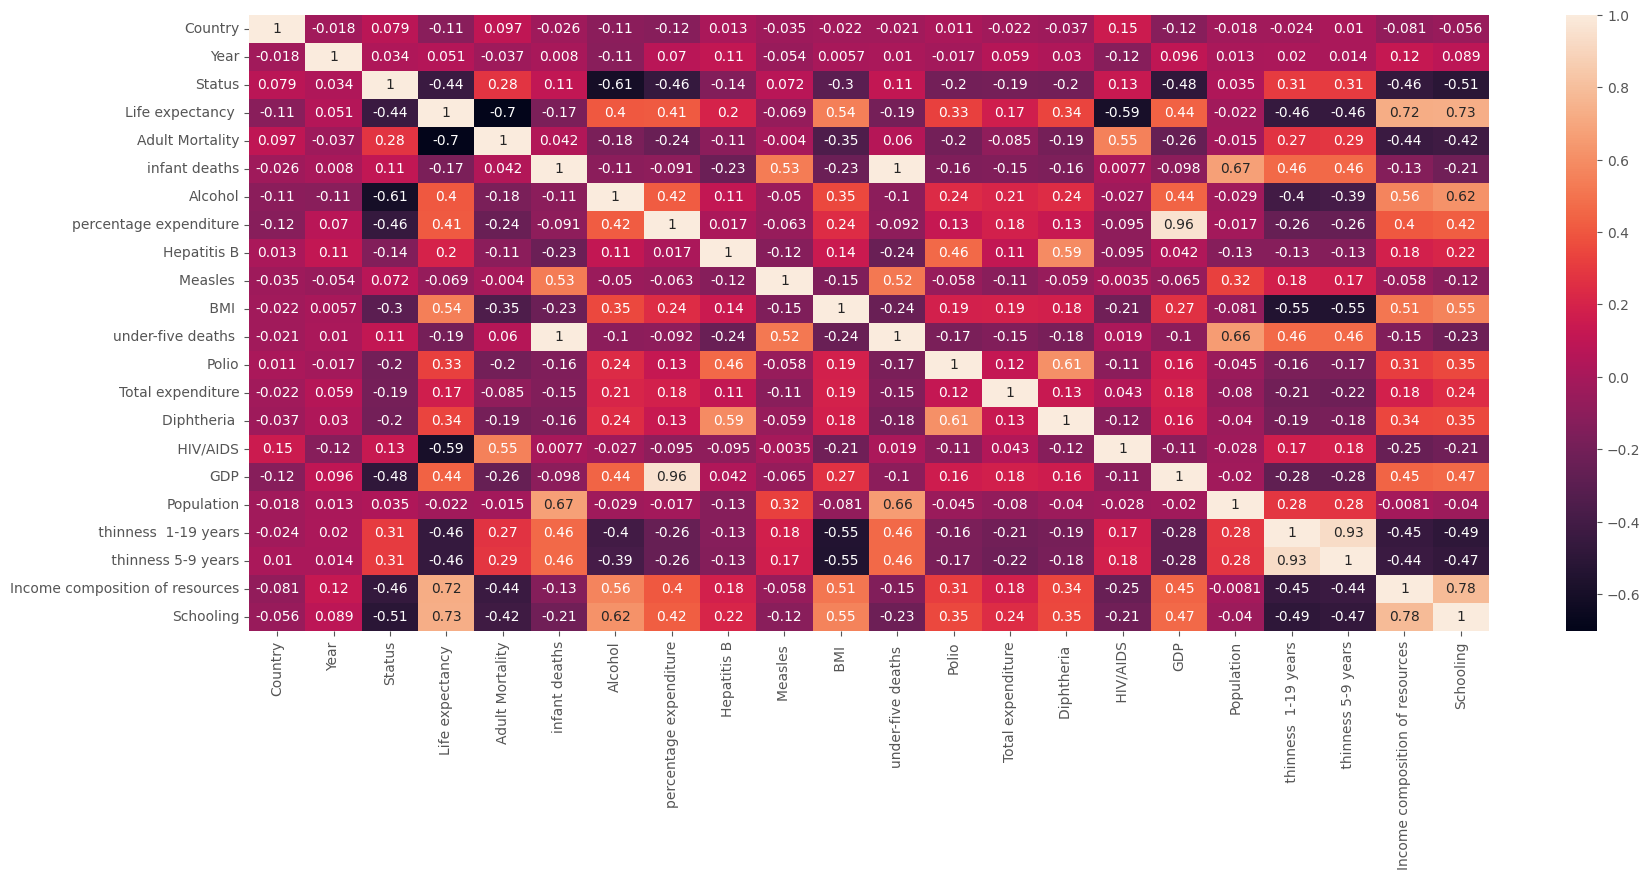

In [27]:
# showing correlation using heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True)
plt.show()

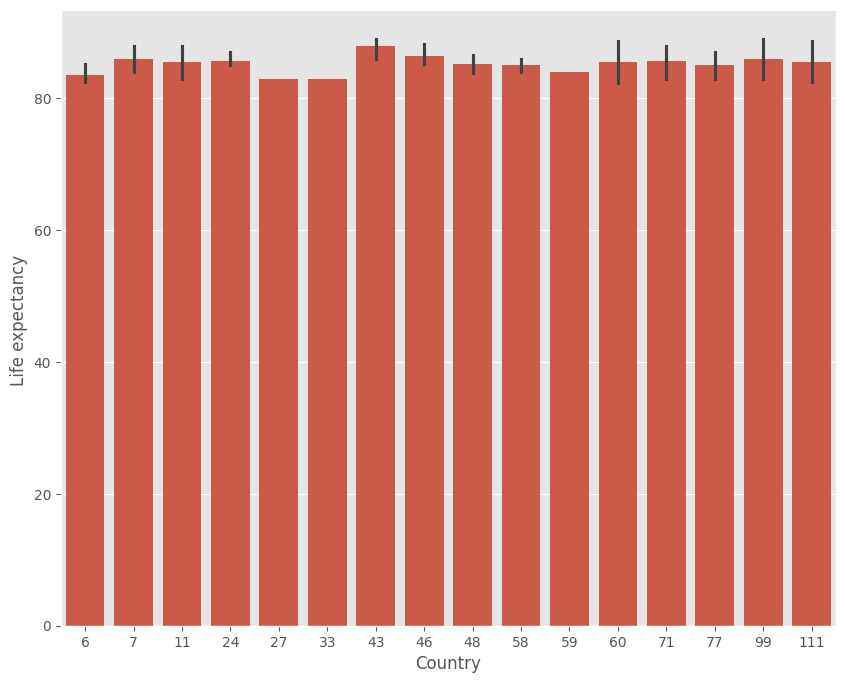

In [28]:
# barchart showing life expectancy in each country top 50
df_top_50 = df.sort_values('Life expectancy ', ascending=False).head(50)

plt.figure(figsize=(10,8))
sns.barplot(data=df_top_50, y='Life expectancy ', x='Country')
plt.show()

In [29]:
# Convert Life expectancy into categories
df['Life_Category'] = pd.cut(
    df['Life expectancy '],
    bins=[40, 60, 75, 90],
    labels=['Low', 'Medium', 'High']
)

# Encode categories into numbers
le = LabelEncoder()
df['Life_Category'] = le.fit_transform(df['Life_Category'])
# Define features (X) and target (y)
X = df.drop(columns=['Life expectancy ', 'Life_Category'])
Y = df['Life_Category']

In [30]:
# showing which life expectancy comes in which category
(df[['Life expectancy ', 'Life_Category']]).head(20)

Life expectancy   Life_Category
0               65.0              2
1               59.9              1
2               59.9              1
3               59.5              1
4               59.2              1
5               58.8              1
6               58.6              1
7               58.1              1
8               57.5              1
9               57.3              1
10              57.3              1
11              57.0              1
12              56.7              1
13              56.2              1
14              55.3              1
15              54.8              1
16              77.8              0
17              77.5              0
18              77.2              0
19              76.9              0

In [31]:
X.head() # showing the first 5 rows of the dataset without life expectancy

Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
0        0  2015       1         0.756629             62     0.01   
1        0  2014       1         0.820490             64     0.01   
2        0  2013       1         0.796542             66     0.01   
3        0  2012       1         0.828472             69     0.01   
4        0  2011       1         0.852420             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [32]:
Y.head() # showing first 5 rows of the dataset having only life expectancy

0    2
1    1
2    1
3    1
4    1
Name: Life_Category, dtype: int64

In [33]:
# performing train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Models output info
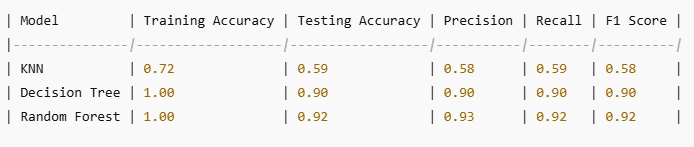

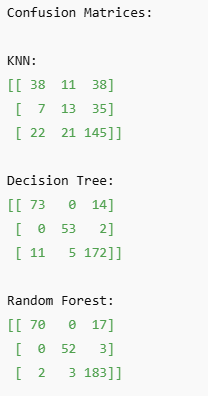

From the results, it is clear that the baseline model (KNN) performed poorly with a testing accuracy of only 59%. In contrast, the Decision Tree improved the performance significantly with 90% accuracy, while the Random Forest gave the best results with 92% accuracy, 93% precision, and 92% recall. The confusion matrices also show that Random Forest correctly classified more samples with fewer misclassifications.

In [34]:
#Model Training (KNN Classifier, Decision Tree Classifier, Random forest Classifier)
# initializing models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
# Training models
knn.fit(X_train, Y_train)
dt.fit(X_train,Y_train)
rf.fit(X_train,Y_train)
# make predictions on the tested data
Y_pred = knn.predict(X_test)
Y_pred1 = dt.predict(X_test)
Y2_pred = rf.predict(X_test)
# put the models in a dictionary
models = {'KNN':knn, 'Decision Tree':dt, 'Random Forest':rf}
#evaluate each model using loop
for name,model in models.items():
  Y_pred = model.predict(X_test)
  #Model Accuracy
  accuracy = accuracy_score(Y_test, Y_pred)
  precision = precision_score(Y_test, Y_pred,average='weighted')
  recall = recall_score(Y_test, Y_pred,average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  conf_matrix = confusion_matrix(Y_test, Y_pred)

  # Print the metrics
  print(f"Accuracy: {accuracy:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 Score: {f1:.2f}")
  print("Confusion Matrix:",conf_matrix)
  print(f'Training accuracy: {model.score(X_train, Y_train)}')
  print(f'Testing accuracy: {model.score(X_test, Y_test)}')


Accuracy: 0.59
Precision: 0.58
Recall: 0.59
F1 Score: 0.58
Confusion Matrix: [[ 38  11  38]
 [  7  13  35]
 [ 22  21 145]]
Training accuracy: 0.7217589082638363
Testing accuracy: 0.593939393939394
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Confusion Matrix: [[ 73   0  14]
 [  0  53   2]
 [ 12   4 172]]
Training accuracy: 1.0
Testing accuracy: 0.9030303030303031
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Confusion Matrix: [[ 73   0  14]
 [  0  53   2]
 [  1   4 183]]
Training accuracy: 1.0
Testing accuracy: 0.9363636363636364


#ROC for the best performing model

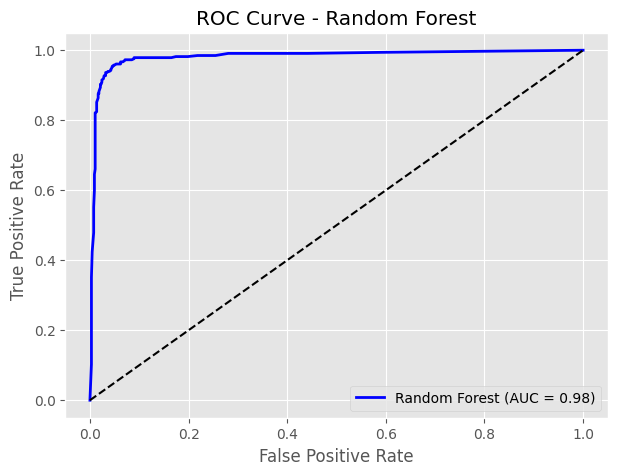

In [35]:
# Binarize the labels for multiclass ROC
n_classes = len(set(Y_test))
Y_test_bin = label_binarize(Y_test, classes=list(set(Y_test)))

# Predict probabilities for Random Forest
y_prob = rf.predict_proba(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), y_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

In [36]:
# Get feature importance
importances = rf.feature_importances_
features = X_train.columns

# Create DataFrame
feat_importances = pd.Series(importances, index=features).sort_values(ascending=True)

# Print top features
print(feat_importances)

Status                             0.006737
Year                               0.011008
Measles                            0.011964
Hepatitis B                        0.012329
Diphtheria                         0.014187
Polio                              0.014295
Population                         0.014643
Country                            0.023347
infant deaths                      0.028065
Total expenditure                  0.032701
under-five deaths                  0.033408
 BMI                               0.033904
GDP                                0.035110
Alcohol                            0.041658
percentage expenditure             0.044289
Schooling                          0.063131
 thinness  1-19 years              0.067873
 thinness 5-9 years                0.079664
 HIV/AIDS                          0.120062
Adult Mortality                    0.137845
Income composition of resources    0.173780
dtype: float64


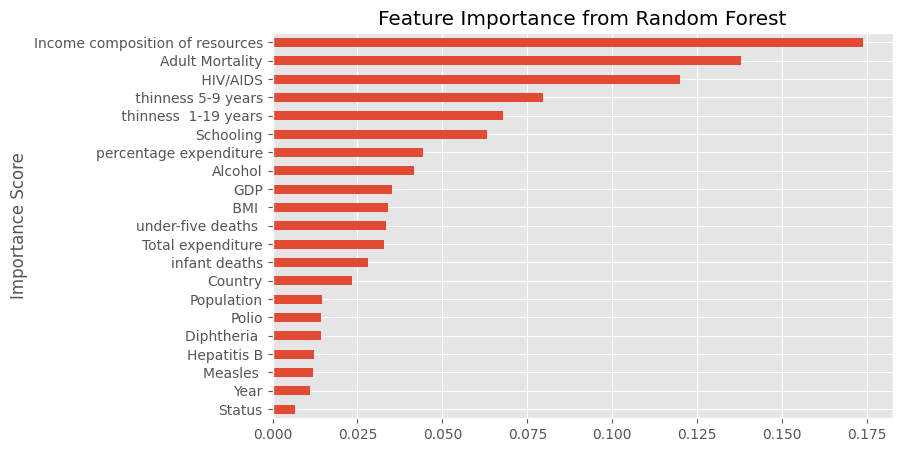

In [37]:
# Visualize
plt.figure(figsize=(8,5))
feat_importances.plot(kind='barh', )
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.show()

#Hyperparameter Tuning
Hyperparameter tuning was performed using RandomizedSearchCV. The tuned models showed improved accuracy compared to their default versions. Random Forest, with tuned parameters, achieved the highest accuracy, proving to be the most reliable model among the three.

In [38]:
# 1. KNN
knn = KNeighborsClassifier()
param_knn = {
    'n_neighbors': np.arange(3, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_search = RandomizedSearchCV(knn, param_knn, cv=5, n_iter=10, scoring='accuracy', random_state=42)
knn_search.fit(X_train, Y_train)
# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
param_dt = {
    'max_depth': np.arange(2, 20),
    'min_samples_split': np.arange(2, 10)
}
dt_search = RandomizedSearchCV(dt, param_dt, cv=5, n_iter=10, scoring='accuracy', random_state=42)
dt_search.fit(X_train, Y_train)
# 3. Random Forest
rf = RandomForestClassifier(random_state=42)
param_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': np.arange(2, 20),
    'min_samples_split': np.arange(2, 10)
}
rf_search = RandomizedSearchCV(rf, param_rf, cv=5, n_iter=10, scoring='accuracy', random_state=42)
rf_search.fit(X_train, Y_train)
# Print best parameters
print("Best KNN Params:", knn_search.best_params_)
print("Best Decision Tree Params:", dt_search.best_params_)
print("Best Random Forest Params:", rf_search.best_params_)
# Compare tuned model scores
print("KNN Tuned Accuracy:", knn_search.best_score_)
print("Decision Tree Tuned Accuracy:", dt_search.best_score_)
print("Random Forest Tuned Accuracy:", rf_search.best_score_)


Best KNN Params: {'weights': 'uniform', 'n_neighbors': np.int64(8), 'metric': 'manhattan'}
Best Decision Tree Params: {'min_samples_split': np.int64(2), 'max_depth': np.int64(9)}
Best Random Forest Params: {'n_estimators': 50, 'min_samples_split': np.int64(6), 'max_depth': np.int64(14)}
KNN Tuned Accuracy: 0.6239831777854591
Decision Tree Tuned Accuracy: 0.9036870607212812
Random Forest Tuned Accuracy: 0.9362858624265469


#Conclusion
**• Which model performed best and why?**

Random forest model performed the best because it has multiple decision trees which makes overfitting less and improved generalization.

**• Which features were most important?**

Most important features derived from random forest were (Income composition of resources,Adult Mortality,HIV/AIDS etc)

**• How did hyperparameter tuning improve results?**

hyperparameter tuning improved the models’ performance by selecting the best parameters (e.g., tree depth, number of neighbors/trees). The tuned Random Forest further boosted accuracy, confirming it as the most reliable and effective model for this dataset.